In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
os.chdir("D:\\Downloads\\")
from preprocessed_mnist import load_dataset

X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

Using TensorFlow backend.


(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


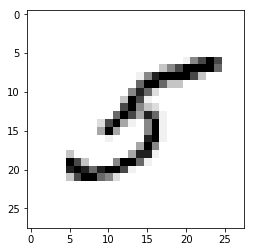

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[35], cmap="Greys")

# Logistic regression


In [4]:
s = tf.Session()

# Reshape features to flat format
X_train_flat = s.run(tf.reshape(X_train, [X_train.shape[0],-1]))
X_test_flat  = s.run(tf.reshape(X_test, [X_test.shape[0],-1]))
X_val_flat   = s.run(tf.reshape(X_val, [X_val.shape[0],-1]))

# Categorical labels to binaries
y_train_oh = s.run(tf.one_hot(y_train, 10))
y_test_oh  = s.run(tf.one_hot(y_test, 10))
y_val_oh   = s.run(tf.one_hot(y_val, 10))

In [5]:
# Model parameters - weights and bias
nhid   = 50
nclass = len(np.unique(y_train))
weights_hid = tf.Variable(tf.random_normal([X_train_flat.shape[1], nhid], stddev=0.35),
                      name="weights_h") 

b_hid = tf.Variable(tf.zeros([nhid]), dtype='float32', name="biases_h")

weights_out = tf.Variable(tf.random_normal([nhid, nclass], stddev=0.35),
                      name="weights") 

b_out = tf.Variable(tf.zeros([nclass]), dtype='float32', name="biases")

# Placeholders for the input data
input_X = tf.placeholder('float32', shape=(None,X_train_flat.shape[1]))
input_y = tf.placeholder('float32', shape=(None, nclass))
input_X, input_y, weights_hid, weights_out, b_hid, b_out

(<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>,
 <tf.Variable 'weights_h:0' shape=(784, 50) dtype=float32_ref>,
 <tf.Variable 'weights:0' shape=(50, 10) dtype=float32_ref>,
 <tf.Variable 'biases_h:0' shape=(50,) dtype=float32_ref>,
 <tf.Variable 'biases:0' shape=(10,) dtype=float32_ref>)

In [6]:
# model
#predicted_y =  tf.nn.softmax(tf.matmul(input_X, weights)+b)
predicted_y_hid =  tf.nn.relu(tf.matmul(input_X, weights_hid)+b_hid)
predicted_y     =  tf.matmul(predicted_y_hid, weights_out)+b_out

# Loss. Should be a scalar number - average loss over all the objects
#loss = tf.reduce_mean(-tf.reduce_sum(tf.log(predicted_y+1e-07)*input_y, reduction_indices=[1]))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=predicted_y))

# See above for an example. tf.train.*Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(
    loss, var_list=(weights_hid, b_hid, weights_out, b_out))

# compute accuracy
correct_prediction = tf.equal(tf.argmax(predicted_y,1), tf.argmax(input_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
from sklearn.metrics import roc_auc_score

trainloss = list()
testloss  = list()
acctrain  = list()
acctest   = list()
s.run(tf.global_variables_initializer())

for i in range(100):
    #batchX, batchY = s.run(tf.train.batch([X_train_flat, y_train_oh],100,enqueue_many=True, capacity=1))
    s.run(optimizer, {input_X: X_train_flat, input_y: y_train_oh})
    #s.run(optimizer, {input_X: batchX, input_y: batchY})
    loss_i = s.run(loss, {input_X: X_train_flat, input_y: y_train_oh})
    trainloss.append(loss_i)
    loss_i = s.run(loss, {input_X: X_test_flat, input_y: y_test_oh})
    testloss.append(loss_i)
    acctrain.append(s.run(accuracy, feed_dict={input_X:X_train_flat, input_y: y_train_oh}))
    acctest.append(s.run(accuracy, feed_dict={input_X:X_test_flat, input_y: y_test_oh}))
    print("loss at iter %i:%.4f" % (i, loss_i))
    print("train auc:", roc_auc_score(y_train_oh, s.run(predicted_y, {input_X:X_train_flat})))
    print("test auc:", roc_auc_score(y_test_oh, s.run(predicted_y, {input_X:X_test_flat})))

loss at iter 0:10.0644
train auc: 0.631174593086
test auc: 0.633884779176
loss at iter 1:7.9098
train auc: 0.67919597849
test auc: 0.67576920267
loss at iter 2:3.1780
train auc: 0.728158291695
test auc: 0.733693820435
loss at iter 3:2.1382
train auc: 0.735436692522
test auc: 0.741996707416
loss at iter 4:1.9383
train auc: 0.75466395063
test auc: 0.761936488147
loss at iter 5:1.8063
train auc: 0.772364002183
test auc: 0.780258788263
loss at iter 6:1.6928
train auc: 0.788015232519
test auc: 0.79621227528
loss at iter 7:1.5888
train auc: 0.801810959322
test auc: 0.809995643682
loss at iter 8:1.4924
train auc: 0.814131025345
test auc: 0.822095294899
loss at iter 9:1.4064
train auc: 0.825227132723
test auc: 0.832920079552
loss at iter 10:1.3340
train auc: 0.8352712022
test auc: 0.84274241418
loss at iter 11:1.2729
train auc: 0.84439923852
test auc: 0.851626539425
loss at iter 12:1.2185
train auc: 0.852664486271
test auc: 0.85966880562
loss at iter 13:1.1692
train auc: 0.860018811628
test au

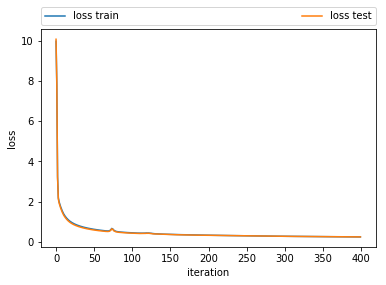

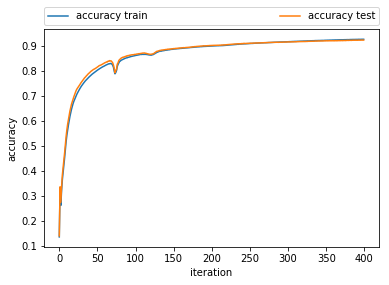

In [18]:
plt.plot(trainloss, label = "loss train")
plt.plot(testloss, label="loss test")
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

plt.plot(acctrain, label = "accuracy train")
plt.plot(acctest, label  = "accuracy test")
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()


In [17]:
correct_prediction = tf.equal(tf.argmax(predicted_y,1), tf.argmax(input_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(s.run(accuracy, feed_dict={input_X:X_train_flat, input_y: y_train_oh}))
print(s.run(accuracy, feed_dict={input_X:X_val_flat, input_y: y_val_oh}))
print(s.run(accuracy, feed_dict={input_X:X_test_flat, input_y: y_test_oh}))

0.92538
0.929
0.9222
